# Example Machine Learning Workflow - Housing Prices

<s>Using this Kaggle competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Using sklearn premade datasets

This will show an example of Linear Regression and XGBoost regression models

https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
import xgboost as xgb

import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

def mse_calc(y_true, y_pred):
    mse = np.mean((y_true-y_pred)**2)
    return mse
def rmse_calc(y_true, y_pred):
    return np.sqrt(mse_calc(y_true, y_pred))

def score(y_true, y_pred):
    var_score = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mse_calc(y_test,y_pred)
    rmse = rmse_calc(y_test, y_pred)

    print(f"R^2: {r2}\nMSE: {mse}\nRMSE: {rmse}")
    return var_score, r2, mse, rmse

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = fetch_california_housing(as_frame=True).frame

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(columns=['MedHouseVal']), df['MedHouseVal'], 
    test_size=0.2, 
    random_state=42)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

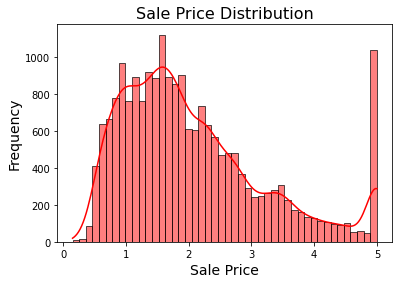

In [2]:
sns.histplot(df['MedHouseVal'], color = 'r', kde=True)
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('distplot.png')
plt.show()

<AxesSubplot:>

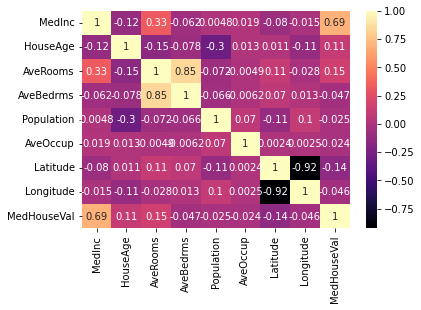

In [3]:
# Correlation Heatmap

sns.heatmap(df.corr(), annot=True, cmap='magma')

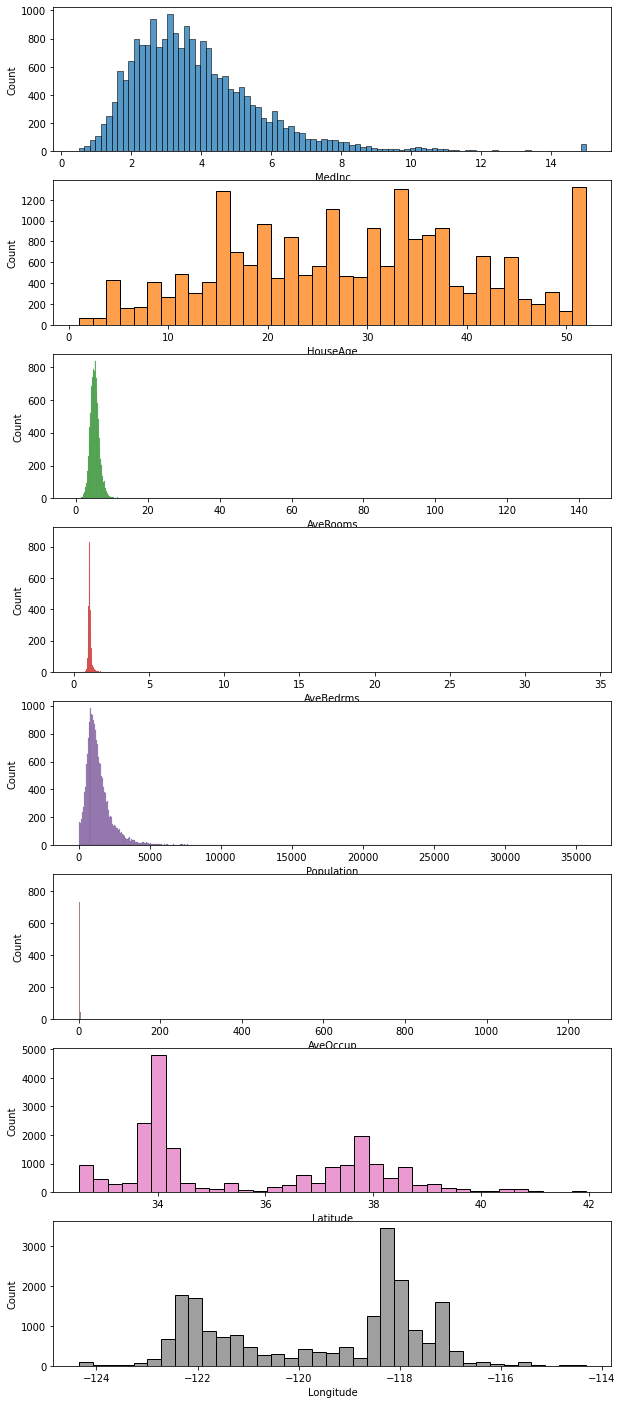

In [4]:
fig, axs = plt.subplots(8, figsize=(10, 25))

for i, col in enumerate(df.columns.tolist()[:-1]):
    # axs[i].set_title(col)
    sns.histplot(df[col], ax=axs[i], color=sns.color_palette()[i])

## Linear Regression Model

Example of the sklearn Linear Regerssion model

In [5]:
lreg = LinearRegression().fit(x_train.astype('int64'), y_train.astype('int64'))

lr_pred = lreg.predict(x_test.astype('int64'))

lr_var, lr_r2, lr_mse, lr_rmse = score(y_test.astype('int64'), lr_pred)

R^2: 0.3483901629577175
MSE: 0.8538753807702966
RMSE: 0.9240537759082512


Exact explainer: 4129it [00:17, 110.76it/s]                                     


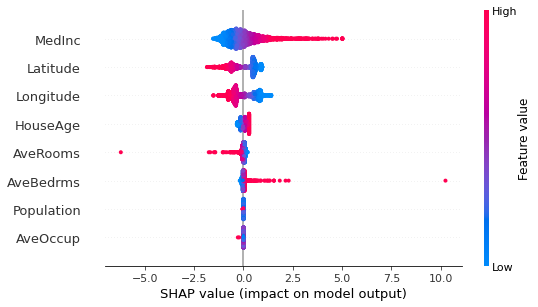

In [6]:
lr_explainer = shap.Explainer(lreg.predict, x_test)
lr_shap_vals = lr_explainer(x_test)
shap.plots.beeswarm(lr_shap_vals)

## XGBoost Regression Model

Example XGBoost Regression - ensemble of boosted weak learners

In [7]:
xgb_model = xgb.XGBRegressor() # standard unchanged
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_var, xgb_r2, xgb_mse, xgb_rmse = score(y_test, xgb_pred)

R^2: 0.828616180679985
MSE: 0.22458289556216388
RMSE: 0.47390177839101205


Exact explainer: 4129it [00:31, 88.18it/s]                                      


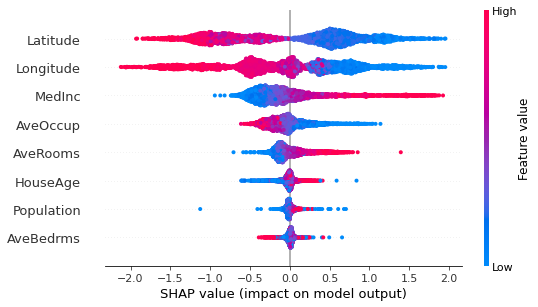

In [8]:
xgb_explainer = shap.Explainer(xgb_model.predict, x_test)
xgb_shap_vals = xgb_explainer(x_test)
shap.plots.beeswarm(xgb_shap_vals)

## Gradient Boosting Machine

An ensemble of weak learners to a strong learner

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

gbm.fit(x_train, y_train)

gbm_pred = gbm.predict(x_test)

gbm_var, gbm_r2, gbm_mse, gbm_rmse = score(y_test, gbm_pred)

R^2: 0.7756923945143868
MSE: 0.2939347001160653
RMSE: 0.5421574495624544


Exact explainer: 4129it [00:52, 63.85it/s]                                      


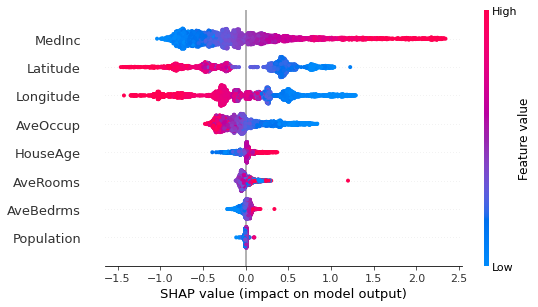

In [10]:
gbm_explainer = shap.Explainer(gbm.predict, x_test)
gbm_shap_vals = gbm_explainer(x_test)
shap.plots.beeswarm(gbm_shap_vals)